# <u>Experiment - 07 (A)</u>

## To implement fuzzy control system. 

### <u>Create a Tipping controller using the skfuzzy control API<u/>

In [4]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [5]:
# Define the input and output variables
quality = ctrl.Antecedent(np.arange(0,11,1), 'quality')
service = ctrl.Antecedent(np.arange(0,11,1), 'service')
tip = ctrl.Consequent(np.arange(0,26,1), 'tip')

In [6]:
# Define the fuzzy membership function
quality.automf(3)
service.automf(3)

In [7]:
tip['low'] = fuzz.trimf(tip.universe, [0,0,13])
tip['medium'] = fuzz.trimf(tip.universe, [0,13,25])
tip['high'] = fuzz.trimf(tip.universe, [13,25,25])

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:>)

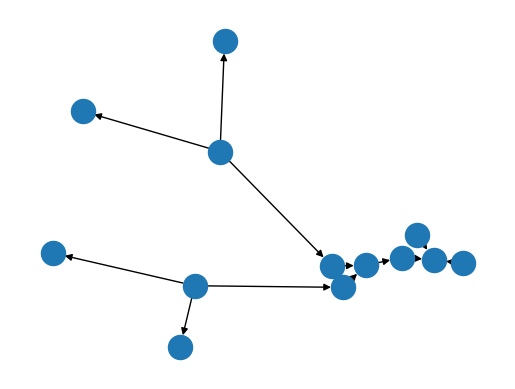

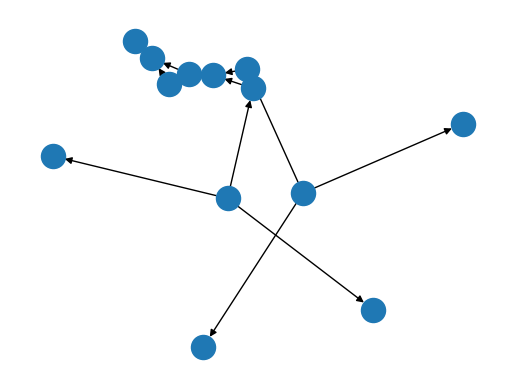

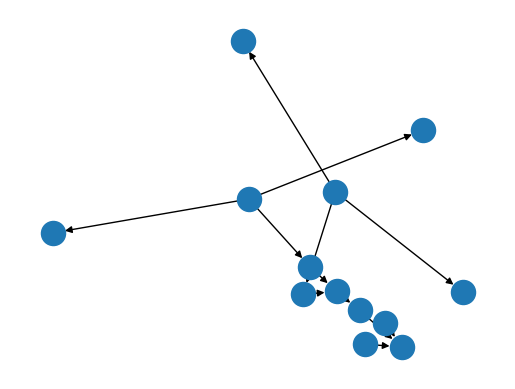

In [8]:
# Create fuzzy rules
rule1 = ctrl.Rule(quality['average'] & service['average'], tip['medium'])
rule2 = ctrl.Rule(quality['good'] & service['poor'], tip['low'])
rule3 = ctrl.Rule(quality['poor'] & service['good'], tip['high'])
rule1.view()
rule2.view()
rule3.view()

In [9]:
# Implement fuzzy inference system
tip_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
tip_sim = ctrl.ControlSystemSimulation(tip_ctrl)

In [10]:
# Provide inputs for calculating the tips
tip_sim.input['quality'] = 6
tip_sim.input['service'] = 9

In [11]:
# Perform fuzzy interference
tip_sim.compute()

In [17]:
# Get the defuzzified tip
tip_output = tip_sim.output['tip']
print(f"Recommended tip amount:{tip_output:.2f}")

Recommended tip amount:12.55


C:\Users\Huzaifa Khan\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


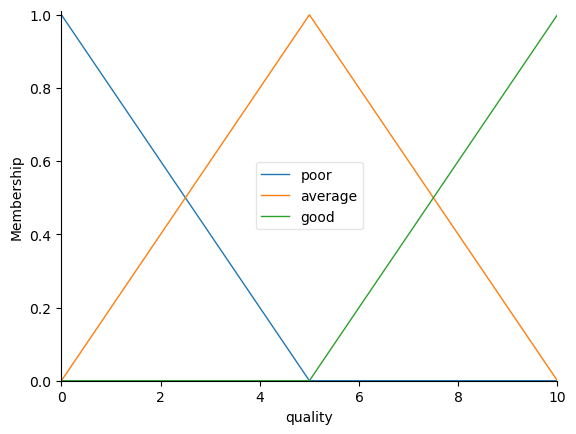

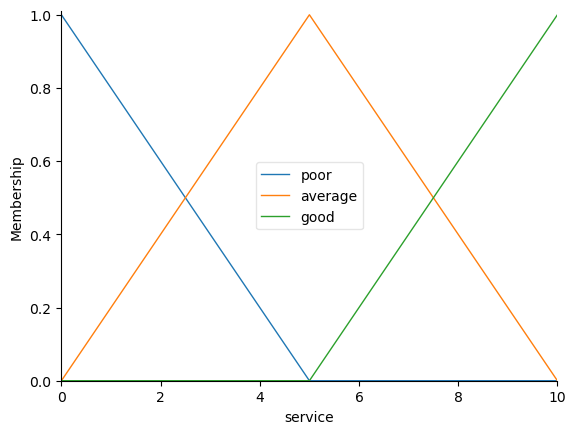

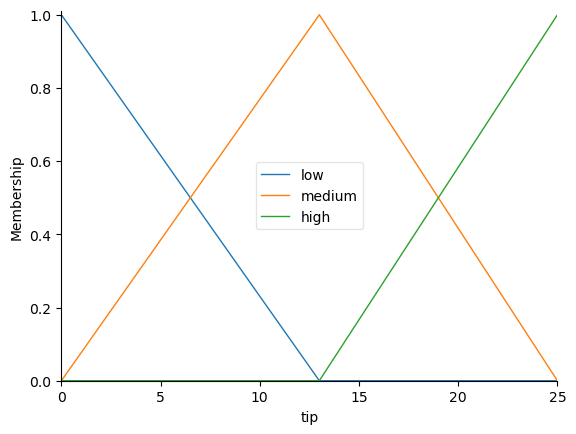

In [18]:
# Visualizing the membership functions 
quality.view()
service.view()
tip.view()

### Example-2: Suppose we have rated the quality 6.5 out of 10 and the service 9.8 of 10.

12.509931972789122


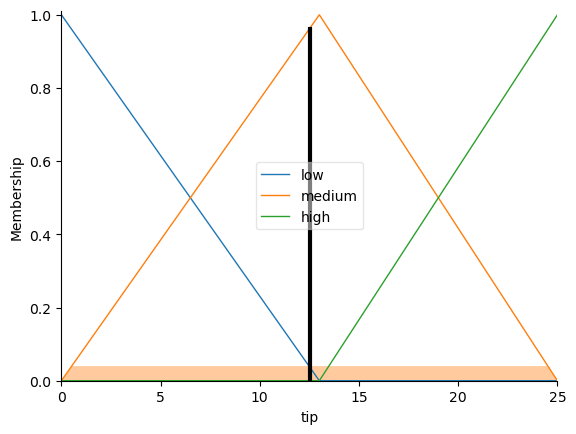

In [20]:
# Implement fuzzy inference system
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['quality'] = 6.5
tipping.input['service'] = 9.8

tipping.compute()

print(tipping.output['tip'])
tip.view(sim=tipping)